In [1]:
import glob
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.set_printoptions(suppress=True)

import seaborn as sns
%matplotlib inline

In [2]:
files = glob.glob('./dat/*timeline*')

len(files)

m = 5000

In [3]:
file = files[100]

with open(file, 'r') as fp:
    match = json.load(fp)

In [4]:
match_id = file.replace('./dat/timeline_','').replace('.json','')
match_file = './dat/match_'+match_id+'.json'

with open(match_file, 'r') as fp:
    match2 = json.load(fp)

In [69]:
def calculate_team_total_and_difference(dat, frames):
    team_total = np.array([np.sum(dat[:,:5],axis=1),np.sum(dat[:,5:],axis=1)]).transpose()
    team_total_diff = np.concatenate((team_total,(team_total[:,0] - team_total[:,1]).reshape((frames,1))),axis=1)
    return team_total_diff

def calculate_team_max_and_difference(dat, frames):
    team_max = np.array([np.max(dat[:,:5],axis=1),np.max(dat[:,5:],axis=1)]).transpose()
    team_max_diff = np.concatenate((team_max,(team_max[:,0] - team_max[:,1]).reshape((frames,1))),axis=1)
    return team_max_diff

def get_dat(match):
    current_gold = []
    total_gold = []
    xp = []
    frames = len(match['frames'])
    for frame in range(frames):
        frame_current_gold = []
        frame_total_gold = []
        frame_xp = []
        for i in range(1,11):
            frame_current_gold.append(match['frames'][frame]['participantFrames'][str(i)]['currentGold'])
            frame_total_gold.append(match['frames'][frame]['participantFrames'][str(i)]['totalGold'])
            frame_xp.append(match['frames'][frame]['participantFrames'][str(i)]['xp'])
        current_gold.append(frame_current_gold)
        total_gold.append(frame_total_gold)
        xp.append(frame_xp)
        
    team_current_gold = calculate_team_total_and_difference(np.array(current_gold), frames)
    team_total_gold = calculate_team_total_and_difference(np.array(total_gold), frames)
    team_xp = calculate_team_total_and_difference(np.array(xp), frames)
    
    team_max_current_gold = calculate_team_max_and_difference(np.array(current_gold), frames)
    team_max_total_gold = calculate_team_max_and_difference(np.array(total_gold), frames)
    team_max_xp = calculate_team_max_and_difference(np.array(xp), frames)
    
    return team_current_gold, team_total_gold, team_xp, team_max_current_gold, team_max_total_gold, team_max_xp, frames

In [37]:
current_gold = []
total_gold = []
xp = []
winners = []
num_frames = []
match_ids = []

m = 1000

for i, file in enumerate(files[:m]):
    with open(file, 'r') as fp:
        match_id = file.replace('./dat/timeline_','').replace('.json','')
        match_file = './dat/match_'+match_id+'.json'

        with open(match_file, 'r') as fp2:
            match2 = json.load(fp2)
            if match2['mapId'] != 11:
                continue
            winner = (match2['teams'][0]['win'] == 'Fail')*1
            winners.append(winner)
        match_ids.append(match_id)
        match = json.load(fp)
        team_current_gold, team_total_gold, team_xp, team_max_current_gold, team_max_total_gold, team_max_xp, frames = get_dat(match)

        current_gold.append(team_current_gold)
        total_gold.append(team_total_gold)
        xp.append(team_xp)
        num_frames.append(frames)

In [38]:
num_matches = len(winners)
num_matches

888

In [8]:
max_frames = np.max(num_frames)
max_frames

49

In [39]:
def convert_to_tensor(dat, num_matches, num_frames):
    for i in range(num_matches):
        dat[i] = np.pad(dat[i], ((0,max_frames - num_frames[i]), (0,0)), 'constant')
    dat = np.array(dat)
    return dat

In [40]:
tensor_current_gold = convert_to_tensor(current_gold, num_matches, num_frames)
tensor_total_gold = convert_to_tensor(total_gold, num_matches, num_frames)
tensor_xp = convert_to_tensor(xp, num_matches, num_frames)
winners = np.array(winners)

In [41]:
print(tensor_current_gold.shape)
print(tensor_total_gold.shape)
print(tensor_xp.shape)

(888, 49, 3)
(888, 49, 3)
(888, 49, 3)


In [143]:
tensor_current_gold_avg = np.mean(tensor_current_gold[:,:,2],axis=1)
tensor_current_gold_avg
tensor_current_gold_std = np.std(tensor_current_gold[:,:,2],axis=1)
tensor_current_gold_std

tensor_total_gold_avg = np.mean(tensor_total_gold[:,:,2],axis=1)
tensor_total_gold_std = np.std(tensor_total_gold[:,:,2],axis=1)

array([1863.26203825, 5803.18566874, 3777.64037812, 2286.42322221,
       3939.5634884 , 2589.0257485 , 3865.96233438, 1770.65043957,
       4780.05932378, 2065.47346225, 5762.98363465, 3343.30192266,
       2008.4001493 , 2215.07642353, 3860.23905459, 3172.30354925,
       1431.89429806, 1625.60203898, 2433.54538139, 2028.07229515,
       2476.85571976, 2879.0602124 , 3698.01875634, 2205.32816869,
       4759.09339335, 3520.75782654, 2157.14850684, 1665.47896796,
       2657.16512439, 2406.27112752, 4431.9794964 , 2855.08018524,
       2255.70490867, 2532.77184567, 4537.5585774 , 3889.89746879,
       3117.64222449, 2294.11854896, 1897.55501677, 2427.57082291,
       2632.08922484, 3331.61941875, 3151.08645257, 5094.24332372,
       1515.35581616, 3944.197258  , 1950.64205765, 2445.13634154,
       4002.00750009, 3883.78046598, 2008.66741419, 2304.64092006,
       2712.98577247, 3302.01970917, 1739.50274152, 2715.17083052,
       3782.57220478, 1491.64513253, 3330.75370749, 2586.29703

In [173]:
tensor_total_gold_avg = np.mean(tensor_total_gold[:,:,2][winners==0],axis=1)
tensor_total_gold_std = np.std(tensor_total_gold[:,:,2][winners==0],axis=1)

ValueError: operands could not be broadcast together with shapes (888,) (888,49) 

In [172]:
tensor_total_gold[:,frame,2][(winners==0) & tensor_total_gold[:,frame,2] != 0]

array([-1543, 16939,  5577,  9355,  -775, 15519,  -717, -1913,  3591,
        1793,  4567, -8271,   731,  1407,   595,   565,  1867, -5597,
        5275,  5113,  3789,   141,  1945, 13235, 18915,   143, -2763,
        6943,   333,  7887,  1831,  2343,  5261,  6019,  5723,  6505,
        1935, -2055,  3355, -1363,   943,  2635,  2987,  9143,  9535,
        -329,  3483,  3781,  1943,  3751,  4761,  2115,  4969,  4407,
       -1391,  6859, -3855,  1049, -2349,  5785,  3497,   473,   583,
        2493,  5693, -1547,  1925,  1073,  1711,   505,  3525,  2671,
        2901,  1643,  6077,  5535, -1757,  1757,  7125,  5893,    39,
        2457,  9205,  3121,  5209, 11353,   509,  -579,  -429, -1537,
       12775, -2613,  1347,  1139,  3121,  1109,  7657,  9175, 10705,
        1913,  6633,  6037,  4857,  6539,  5219,  7531,  8633,  1593,
        8717,  4123,  1091,  4959,  5451,  3909,  -163,  7697,  3989,
           1, -2683,  -349, -2205,   463,  4879,   953,  5537,  9815,
        4661,  5391,

In [49]:
avg = []
std = []
counts = []
avg_fraction = []
std_fraction = []

cur_winner = 0

for frame in range(max_frames):
    indices = (winners==cur_winner) & (tensor_total_gold[:,frame,2] != 0)
    fractional_diff = tensor_total_gold[:,frame,2] / tensor_total_gold[:,frame,0]
    avg.append(np.mean(tensor_total_gold[:,frame,2][indices]))
    std.append(np.std(tensor_total_gold[:,frame,2][indices]))
    avg_fraction.append(np.mean(fractional_diff[indices]))
    std_fraction.append(np.std(fractional_diff[indices]))
    counts.append(len(tensor_total_gold[:,frame,2][indices]))

/Users/ccl/anaconda3/envs/test/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/ccl/anaconda3/envs/test/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/ccl/anaconda3/envs/test/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/ccl/anaconda3/envs/test/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/ccl/anaconda3/envs/test/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/ccl/anaconda3/envs/test/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value enco

In [64]:
frame = -10
indices = (winners==cur_winner) & (tensor_total_gold[:,frame,2] != 0)
print(np.where(indices))
tensor_total_gold[:,frame,2][indices]

(array([ 28,  44,  76, 101, 110, 143, 191, 243, 248, 272, 281, 291, 368,
       409, 422, 431, 503, 549, 725, 741, 782]),)


array([ 4712,  5721, -2030, -5031,    78,  8059,  6551,  5560,  8906,
        8024,  2534, -5294, 14986, -4716,  9655,  5258,  7668,  6353,
       10562, -1509,   -20])

In [65]:
np.where(indices)

(array([ 28,  44,  76, 101, 110, 143, 191, 243, 248, 272, 281, 291, 368,
        409, 422, 431, 503, 549, 725, 741, 782]),)

In [68]:
[int(x) for x in np.array(match_ids)[np.where(indices)]]

[2719060322,
 2720141598,
 2737314939,
 2746516932,
 2749098820,
 2756865141,
 2761396673,
 2765041861,
 2765143572,
 2769748980,
 2771534907,
 2772371484,
 2778323149,
 2780757506,
 2781361647,
 2781615740,
 2783630957,
 2784651369,
 2787699111,
 2788017115,
 2788582633]

In [19]:
counts

[0,
 80,
 475,
 477,
 473,
 467,
 468,
 468,
 467,
 468,
 467,
 467,
 466,
 465,
 464,
 463,
 458,
 441,
 433,
 430,
 418,
 409,
 385,
 362,
 337,
 306,
 277,
 253,
 227,
 199,
 173,
 147,
 119,
 106,
 87,
 69,
 56,
 44,
 34,
 30,
 21,
 16,
 10,
 5,
 4,
 4,
 4,
 4,
 1]

<ErrorbarContainer object of 3 artists>

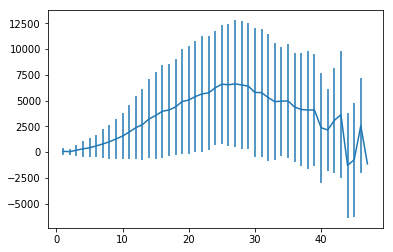

In [34]:
plt.errorbar(range(max_frames),avg,yerr=[std,std])

<ErrorbarContainer object of 3 artists>

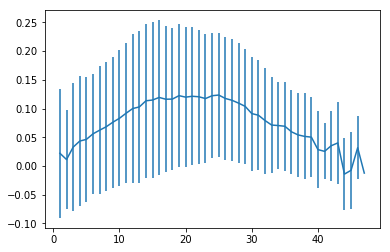

In [50]:
plt.errorbar(range(max_frames),avg_fraction,yerr=[std_fraction,std_fraction])

In [53]:
avg = []
std = []
counts = []
avg_fraction = []
std_fraction = []

cur_winner = 0

for frame in range(max_frames):
    indices = (winners==cur_winner) & (tensor_total_gold[:,frame,2] != 0)
    fractional_diff = tensor_total_gold[:,frame,2] / tensor_total_gold[:,frame,0]
    avg.append(np.sum(tensor_total_gold[:,frame,2][indices] > 0))
#    std.append(np.std(tensor_total_gold[:,frame,2][indices]))
#    avg_fraction.append(np.mean(fractional_diff[indices]))
#    std_fraction.append(np.std(fractional_diff[indices]))
    counts.append(len(tensor_total_gold[:,frame,2][indices]))

/Users/ccl/anaconda3/envs/test/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


/Users/ccl/anaconda3/envs/test/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


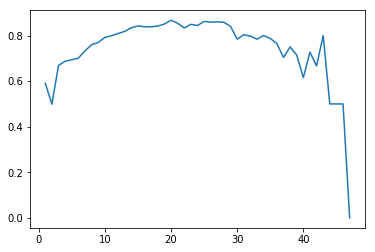

In [57]:
plt.plot(np.array(avg)/counts)